In [49]:
!pip install librosa

Defaulting to user installation because normal site-packages is not writeable


In [50]:
import librosa

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
filename='drinking_1.wav'

In [53]:
import IPython.display as ipd
import librosa
import librosa.display

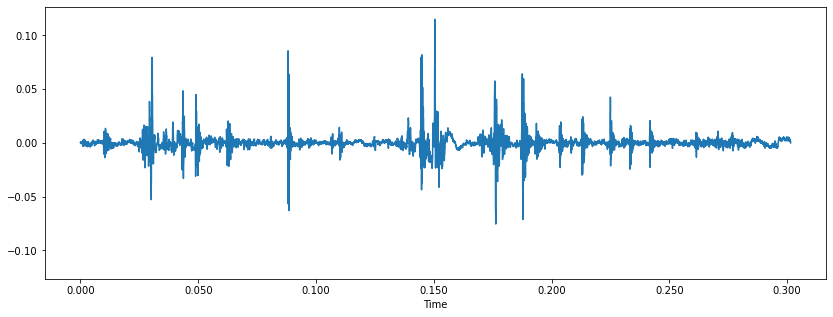

In [54]:
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate) # Need to use waveshow instead of waveplot 
ipd.Audio(filename)

In [55]:
sample_rate

22050

In [56]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)

In [57]:
wave_sample_rate

44100

In [58]:
wave_audio

array([[-11,  19],
       [-10,  56],
       [ 25,  57],
       ...,
       [-24,  43],
       [-65,  53],
       [ 13,  83]], dtype=int16)

In [59]:
data


array([0.0003356 , 0.0007713 , 0.00045295, ..., 0.00137668, 0.00072331,
       0.        ], dtype=float32)

In [60]:
import pandas as pd
metadata=pd.read_csv('metadata.csv')
metadata.head(30) 

,file_name,classID,class
0,drinking_1,1,drinking
1,drinking_2,1,drinking
2,drinking_3,1,drinking
3,drinking_4,1,drinking
4,drinking_5,1,drinking
5,drinking_6,1,drinking
6,drinking_7,1,drinking
7,drinking_8,1,drinking
8,drinking_9,1,drinking
9,drinking_10,1,drinking


In [61]:
### Check whether the dataset is imbalanced
metadata['class'].value_counts()

drinking    30
eating      24
Name: class, dtype: int64

In [62]:
import librosa
import pandas as pd
import os
import numpy as np
from tqdm import tqdm
audio_file_path='datasets/drinking_27.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [63]:
print(librosa_audio_data)

[ 0.          0.          0.         ... -0.00271004 -0.00306091
  0.        ]


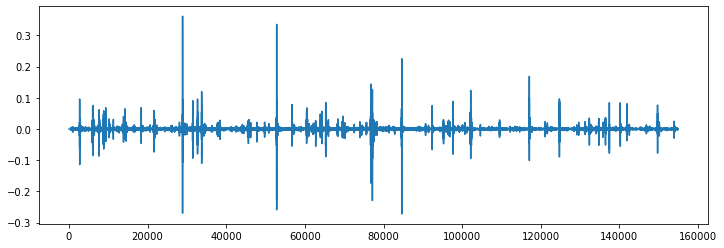

In [64]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [65]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [66]:
wave_audio

array([[   0,    0],
       [   0,    0],
       [   0,    0],
       ...,
       [-137,  -57],
       [-123,  -19],
       [ -68,   21]], dtype=int16)

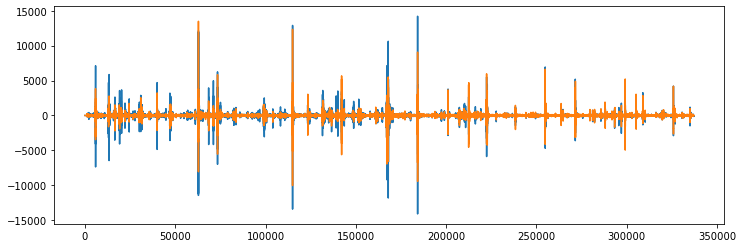

In [67]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

In [68]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape) 

(40, 303)


In [69]:
mfccs

array([[-6.1636249e+02, -4.8351184e+02, -4.4950311e+02, ...,
        -4.3532477e+02, -4.2168604e+02, -4.7819540e+02],
       [ 4.1646214e+01,  3.8741379e+01,  4.3934566e+01, ...,
         1.1738878e+01,  4.6563644e+00,  3.4123352e+01],
       [-1.4452400e+01, -8.4068661e+00,  1.1185403e+00, ...,
         1.9306770e+01,  1.6573826e+01,  6.6564898e+00],
       ...,
       [ 1.0676720e+00,  2.6426053e+00,  1.1231985e+00, ...,
        -2.3010750e+00, -7.2919893e-01,  1.0735506e-01],
       [-3.9970460e+00, -3.4713233e+00, -4.9380598e+00, ...,
        -8.4230671e+00, -7.1907167e+00,  3.9676195e-01],
       [ 3.2245064e+00,  3.5014215e+00,  1.1472571e-01, ...,
        -5.9836311e+00, -4.9873199e+00,  8.5075170e-01]], dtype=float32)

In [70]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='datasets'
metadata=pd.read_csv('metadata.csv')
metadata.head(60)

,file_name,classID,class
0,drinking_1,1,drinking
1,drinking_2,1,drinking
2,drinking_3,1,drinking
3,drinking_4,1,drinking
4,drinking_5,1,drinking
5,drinking_6,1,drinking
6,drinking_7,1,drinking
7,drinking_8,1,drinking
8,drinking_9,1,drinking
9,drinking_10,1,drinking


In [71]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
    

In [72]:
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),str(row["file_name"]))
    print(file_name)

54it [00:00, 3550.04it/s]

/home/bfashina/695_audio_subsystem/datasets/drinking_1
/home/bfashina/695_audio_subsystem/datasets/drinking_2
/home/bfashina/695_audio_subsystem/datasets/drinking_3
/home/bfashina/695_audio_subsystem/datasets/drinking_4
/home/bfashina/695_audio_subsystem/datasets/drinking_5
/home/bfashina/695_audio_subsystem/datasets/drinking_6
/home/bfashina/695_audio_subsystem/datasets/drinking_7
/home/bfashina/695_audio_subsystem/datasets/drinking_8
/home/bfashina/695_audio_subsystem/datasets/drinking_9
/home/bfashina/695_audio_subsystem/datasets/drinking_10
/home/bfashina/695_audio_subsystem/datasets/drinking_11
/home/bfashina/695_audio_subsystem/datasets/drinking_12
/home/bfashina/695_audio_subsystem/datasets/drinking_13
/home/bfashina/695_audio_subsystem/datasets/drinking_14
/home/bfashina/695_audio_subsystem/datasets/drinking_15
/home/bfashina/695_audio_subsystem/datasets/drinking_16
/home/bfashina/695_audio_subsystem/datasets/drinking_17
/home/bfashina/695_audio_subsystem/datasets/drinking_18
/

In [73]:
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),str(row["file_name"])+'.wav')
    print(file_name)
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

0it [00:00, ?it/s]

/home/bfashina/695_audio_subsystem/datasets/drinking_1.wav
/home/bfashina/695_audio_subsystem/datasets/drinking_2.wav
/home/bfashina/695_audio_subsystem/datasets/drinking_3.wav
/home/bfashina/695_audio_subsystem/datasets/drinking_4.wav


4it [00:00, 38.20it/s]

/home/bfashina/695_audio_subsystem/datasets/drinking_5.wav
/home/bfashina/695_audio_subsystem/datasets/drinking_6.wav


6it [00:00, 25.37it/s]

/home/bfashina/695_audio_subsystem/datasets/drinking_7.wav


8it [00:00, 21.41it/s]

/home/bfashina/695_audio_subsystem/datasets/drinking_8.wav
/home/bfashina/695_audio_subsystem/datasets/drinking_9.wav
/home/bfashina/695_audio_subsystem/datasets/drinking_10.wav


10it [00:00, 19.38it/s]

/home/bfashina/695_audio_subsystem/datasets/drinking_11.wav


12it [00:00, 17.98it/s]

/home/bfashina/695_audio_subsystem/datasets/drinking_12.wav
/home/bfashina/695_audio_subsystem/datasets/drinking_13.wav
/home/bfashina/695_audio_subsystem/datasets/drinking_14.wav


14it [00:00, 17.83it/s]

/home/bfashina/695_audio_subsystem/datasets/drinking_15.wav


16it [00:00, 17.88it/s]

/home/bfashina/695_audio_subsystem/datasets/drinking_16.wav
/home/bfashina/695_audio_subsystem/datasets/drinking_17.wav
/home/bfashina/695_audio_subsystem/datasets/drinking_18.wav
/home/bfashina/695_audio_subsystem/datasets/drinking_19.wav


21it [00:01, 17.31it/s]

/home/bfashina/695_audio_subsystem/datasets/drinking_20.wav
/home/bfashina/695_audio_subsystem/datasets/drinking_21.wav
/home/bfashina/695_audio_subsystem/datasets/drinking_22.wav
/home/bfashina/695_audio_subsystem/datasets/drinking_23.wav


23it [00:01, 15.58it/s]

/home/bfashina/695_audio_subsystem/datasets/drinking_24.wav
/home/bfashina/695_audio_subsystem/datasets/drinking_25.wav


25it [00:01, 14.97it/s]

/home/bfashina/695_audio_subsystem/datasets/drinking_26.wav


27it [00:01, 13.10it/s]

/home/bfashina/695_audio_subsystem/datasets/drinking_27.wav
/home/bfashina/695_audio_subsystem/datasets/drinking_28.wav
/home/bfashina/695_audio_subsystem/datasets/drinking_29.wav


29it [00:01, 12.71it/s]

/home/bfashina/695_audio_subsystem/datasets/drinking_30.wav
/home/bfashina/695_audio_subsystem/datasets/eating_1.wav


31it [00:01, 12.32it/s]

/home/bfashina/695_audio_subsystem/datasets/eating_2.wav
/home/bfashina/695_audio_subsystem/datasets/eating_3.wav


33it [00:02, 11.40it/s]

/home/bfashina/695_audio_subsystem/datasets/eating_4.wav
/home/bfashina/695_audio_subsystem/datasets/eating_5.wav


35it [00:02, 10.77it/s]

/home/bfashina/695_audio_subsystem/datasets/eating_6.wav
/home/bfashina/695_audio_subsystem/datasets/eating_7.wav


37it [00:02, 10.23it/s]

/home/bfashina/695_audio_subsystem/datasets/eating_8.wav
/home/bfashina/695_audio_subsystem/datasets/eating_9.wav


39it [00:02,  9.52it/s]

/home/bfashina/695_audio_subsystem/datasets/eating_10.wav


41it [00:03,  9.86it/s]

/home/bfashina/695_audio_subsystem/datasets/eating_11.wav
/home/bfashina/695_audio_subsystem/datasets/eating_12.wav
/home/bfashina/695_audio_subsystem/datasets/eating_13.wav


43it [00:03,  9.74it/s]

/home/bfashina/695_audio_subsystem/datasets/eating_14.wav


44it [00:03,  9.37it/s]

/home/bfashina/695_audio_subsystem/datasets/eating_15.wav


45it [00:03,  9.00it/s]

/home/bfashina/695_audio_subsystem/datasets/eating_16.wav


46it [00:03,  8.76it/s]

/home/bfashina/695_audio_subsystem/datasets/eating_17.wav


48it [00:03,  9.56it/s]

/home/bfashina/695_audio_subsystem/datasets/eating_18.wav
/home/bfashina/695_audio_subsystem/datasets/eating_19.wav
/home/bfashina/695_audio_subsystem/datasets/eating_20.wav


50it [00:03,  9.79it/s]

/home/bfashina/695_audio_subsystem/datasets/eating_21.wav


52it [00:04,  9.93it/s]

/home/bfashina/695_audio_subsystem/datasets/eating_22.wav
/home/bfashina/695_audio_subsystem/datasets/eating_23.wav
/home/bfashina/695_audio_subsystem/datasets/eating_24.wav


54it [00:04, 12.47it/s]


In [74]:
# converting extracted spectral features of drinking and eating to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head(60)

,feature,class
0,"[-328.13235, 65.59392, -38.67035, 5.4069204, -...",drinking
1,"[-349.1521, 42.501, -31.456575, 26.431646, -8....",drinking
2,"[-320.457, 63.11254, -37.251663, 11.011498, -7...",drinking
3,"[-372.1402, 41.927353, -35.564915, 37.086433, ...",drinking
4,"[-391.85892, 51.45334, -27.665045, 38.51123, -...",drinking
5,"[-393.057, 52.50954, -32.272507, 42.311592, -1...",drinking
6,"[-369.73642, 54.40033, -21.231104, 18.653389, ...",drinking
7,"[-367.96658, 33.382538, -21.234932, 23.701822,...",drinking
8,"[-374.24503, 40.232742, -26.485298, 29.021276,...",drinking
9,"[-329.38553, 47.81891, -35.86021, 9.928306, -2...",drinking


In [75]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [76]:
X.shape

(54, 40)

In [77]:
y

array(['drinking', 'drinking', 'drinking', 'drinking', 'drinking',
       'drinking', 'drinking', 'drinking', 'drinking', 'drinking',
       'drinking', 'drinking', 'drinking', 'drinking', 'drinking',
       'drinking', 'drinking', 'drinking', 'drinking', 'drinking',
       'drinking', 'drinking', 'drinking', 'drinking', 'drinking',
       'drinking', 'drinking', 'drinking', 'drinking', 'drinking',
       'eating', 'eating', 'eating', 'eating', 'eating', 'eating',
       'eating', 'eating', 'eating', 'eating', 'eating', 'eating',
       'eating', 'eating', 'eating', 'eating', 'eating', 'eating',
       'eating', 'eating', 'eating', 'eating', 'eating', 'eating'],
      dtype='<U8')

In [78]:
!python3.8 -m pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [79]:
!python3.8 -m pip install --upgrade numpy

Defaulting to user installation because normal site-packages is not writeable


In [80]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [81]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0) 

In [82]:
X_train

array([[-3.3676266e+02,  5.3060539e+01, -3.8876198e+01, ...,
        -9.7178423e-01, -1.7176894e+00, -1.0333227e+00],
       [-4.1931671e+02,  7.2452637e+01, -2.8935293e+01, ...,
        -1.5276170e+00, -3.7079626e-01, -1.2778987e+00],
       [-3.2438818e+02,  5.3418697e+01, -2.3874989e+01, ...,
         9.9154836e-01, -2.6429741e+00,  1.0271179e-01],
       ...,
       [-3.2813235e+02,  6.5593918e+01, -3.8670349e+01, ...,
        -8.6937004e-01, -9.8114902e-01,  1.3255455e+00],
       [-4.7507056e+02,  9.0369812e+01, -5.6311269e+00, ...,
        -8.8141777e-02,  7.2443038e-01,  1.1776618e+00],
       [-5.0273953e+02,  6.0566822e+01, -1.0284364e+01, ...,
         1.7574224e+00,  1.5549127e+00,  1.8060484e+00]], dtype=float32)

In [83]:
X_train.shape

(43, 40)

In [84]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [85]:
y_train.shape

(43, 2)

In [86]:
import tensorflow as tf 
print(tf.__version__)

2.8.0


In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [88]:
### No of classes
num_labels=y.shape[1]

In [89]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [90]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               4100      
                                                                 
 activation_4 (Activation)   (None, 100)               0         
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 200)               20200     
                                                                 
 activation_5 (Activation)   (None, 200)               0         
                                                                 
 dropout_4 (Dropout)         (None, 200)               0         
                                                                 
 dense_6 (Dense)             (None, 100)              

In [91]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [92]:
# Trianing... 
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='models/drinking_rec.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
1/2 [==============>...............] - ETA: 0s - loss: 30.2280 - accuracy: 0.5625
Epoch 1: val_loss improved from inf to 2.88665, saving model to models/drinking_rec.hdf5
2/2 [==============================] - 1s 267ms/step - loss: 30.6678 - accuracy: 0.5349 - val_loss: 2.8867 - val_accuracy: 0.3636
Epoch 2/100
1/2 [==============>...............] - ETA: 0s - loss: 34.4788 - accuracy: 0.5625
Epoch 2: val_loss did not improve from 2.88665
2/2 [==============================] - 0s 35ms/step - loss: 33.7354 - accuracy: 0.4651 - val_loss: 5.5050 - val_accuracy: 0.3636
Epoch 3/100
1/2 [==============>...............] - ETA: 0s - loss: 30.7181 - accuracy: 0.5000
Epoch 3: val_loss did not improve from 2.88665
2/2 [==============================] - 0s 35ms/step - loss: 28.3502 - accuracy: 0.5116 - val_loss: 4.4932 - val_accuracy: 0.3636
Epoch 4/100
1/2 [==============>...............] - ETA: 0s - loss: 39.4523 - accuracy: 0.3750
Epoch 4: val_loss did not improve from 2.88665
2/2 [=

2/2 [==============================] - 0s 23ms/step - loss: 12.8432 - accuracy: 0.4884 - val_loss: 1.2947 - val_accuracy: 0.6364
Epoch 31/100
1/2 [==============>...............] - ETA: 0s - loss: 7.6056 - accuracy: 0.6562
Epoch 31: val_loss did not improve from 0.08950
2/2 [==============================] - 0s 23ms/step - loss: 8.1172 - accuracy: 0.6512 - val_loss: 0.9151 - val_accuracy: 0.6364
Epoch 32/100
1/2 [==============>...............] - ETA: 0s - loss: 14.0994 - accuracy: 0.5000
Epoch 32: val_loss did not improve from 0.08950
2/2 [==============================] - 0s 22ms/step - loss: 13.1885 - accuracy: 0.4419 - val_loss: 0.4913 - val_accuracy: 0.7273
Epoch 33/100
1/2 [==============>...............] - ETA: 0s - loss: 10.3140 - accuracy: 0.5000
Epoch 33: val_loss did not improve from 0.08950
2/2 [==============================] - 0s 23ms/step - loss: 8.7638 - accuracy: 0.5349 - val_loss: 0.2446 - val_accuracy: 1.0000
Epoch 34/100
1/2 [==============>...............] - ETA: 0

Epoch 61/100
1/2 [==============>...............] - ETA: 0s - loss: 5.8008 - accuracy: 0.5312
Epoch 61: val_loss did not improve from 0.08950
2/2 [==============================] - 0s 23ms/step - loss: 5.8463 - accuracy: 0.5116 - val_loss: 0.3538 - val_accuracy: 0.8182
Epoch 62/100
1/2 [==============>...............] - ETA: 0s - loss: 2.2342 - accuracy: 0.6562
Epoch 62: val_loss did not improve from 0.08950
2/2 [==============================] - 0s 37ms/step - loss: 3.4346 - accuracy: 0.6047 - val_loss: 0.3293 - val_accuracy: 0.8182
Epoch 63/100
1/2 [==============>...............] - ETA: 0s - loss: 5.4307 - accuracy: 0.6562
Epoch 63: val_loss did not improve from 0.08950
2/2 [==============================] - 0s 30ms/step - loss: 6.0438 - accuracy: 0.6279 - val_loss: 0.2935 - val_accuracy: 1.0000
Epoch 64/100
1/2 [==============>...............] - ETA: 0s - loss: 3.0408 - accuracy: 0.5625
Epoch 64: val_loss did not improve from 0.08950
2/2 [==============================] - 0s 24ms/s

1/2 [==============>...............] - ETA: 0s - loss: 4.7148 - accuracy: 0.5000
Epoch 91: val_loss did not improve from 0.08950
2/2 [==============================] - 0s 24ms/step - loss: 4.0236 - accuracy: 0.5814 - val_loss: 0.5656 - val_accuracy: 0.8182
Epoch 92/100
1/2 [==============>...............] - ETA: 0s - loss: 2.1739 - accuracy: 0.6562
Epoch 92: val_loss did not improve from 0.08950
2/2 [==============================] - 0s 28ms/step - loss: 1.6923 - accuracy: 0.6977 - val_loss: 0.5533 - val_accuracy: 0.9091
Epoch 93/100
1/2 [==============>...............] - ETA: 0s - loss: 2.4265 - accuracy: 0.6562
Epoch 93: val_loss did not improve from 0.08950
2/2 [==============================] - 0s 24ms/step - loss: 3.2182 - accuracy: 0.6512 - val_loss: 0.5371 - val_accuracy: 0.9091
Epoch 94/100
1/2 [==============>...............] - ETA: 0s - loss: 1.4085 - accuracy: 0.6875
Epoch 94: val_loss did not improve from 0.08950
2/2 [==============================] - 0s 25ms/step - loss: 1

In [93]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

1.0


In [94]:
import random
drink_or_eat = str(random.randint(0,1))
file_num = str(random.randint(1,22))
if drink_or_eat == '0': 
    string="drinking"
elif drink_or_eat == '1': 
    string ="eating"
testfile = string+"_"+file_num+".wav"
testfile

'drinking_16.wav'

File to be analyzed by the model: datasets/drinking_12.wav 

Extracted spectral feature array: 

[-3.2381665e+02  4.6669170e+01 -4.4553780e+01  1.3993423e+01
 -3.7015285e+00  2.1097294e+01 -1.4863907e+01  1.6045078e+01
 -1.3974320e+01  1.2833008e+01 -1.6041307e+01  1.7023417e+01
 -1.2055656e+01  8.6495237e+00 -5.3259878e+00  6.5913520e+00
 -5.5916834e+00  6.6829677e+00 -1.1374994e+01  4.6896682e+00
 -5.9812727e+00  2.9888935e+00 -4.8760190e+00  2.9237769e+00
 -5.0537438e+00  1.6290720e+00 -2.3814278e+00  9.2316502e-01
 -2.7003677e+00  1.8688318e+00 -3.3586798e+00  1.2465740e+00
 -4.9369559e+00  1.4006894e-04 -3.8944986e+00 -1.1029637e+00
 -2.8693655e+00 -1.1393236e+00 -2.0466983e+00 -4.0585122e-01]

Model outcome Label:  [[1 0]]

Final classified behavior: Drinking
Total Duration: 0:0:4


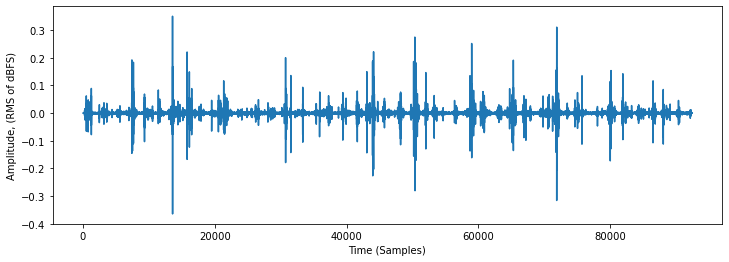

In [95]:
#Randomly select a file from validation set 
import random
drink_or_eat = str(random.randint(0,1))
file_num = str(random.randint(1,22))
if drink_or_eat == '0': 
    string="drinking"
elif drink_or_eat == '1': 
    string ="eating"
testfile = string+"_"+file_num+".wav"

#File to be analyzed
# filename='datasets/'+testfile            #Random 
filename = 'datasets/drinking_12.wav'    #Manual  
print("File to be analyzed by the model: "+filename,"\n")

#Feeding the audio data into the model
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
librosa_audio_data,librosa_sample_rate=librosa.load(filename)
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)
plt.xlabel("Time (Samples)")
plt.ylabel("Amplitude, (RMS of dBFS)")

print("Extracted spectral feature array: \n")
print(mfccs_scaled_features)
# playsound.playsound(filename)

mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
predicted_label=(model.predict(mfccs_scaled_features) > 0.5).astype("int32")
print("\nModel outcome Label: ", predicted_label)

#Interpreting the analyzed data from model 
if predicted_label[0][0] == 1: 
    final_behavior = "Drinking"
elif predicted_label[0][0] == 0: 
    final_behavior = "Eating"
    
print("\nFinal classified behavior: "+final_behavior) 

import audioread
  
# function to convert the information into 
# some readable format
def duration_detector(length):
    hours = length // 3600  # calculate in hours
    length %= 3600
    mins = length // 60  # calculate in minutes
    length %= 60
    seconds = length  # calculate in seconds
  
    return hours, mins, seconds
  
  

with audioread.audio_open(filename) as f:
    
    # totalsec contains the length in float
    totalsec = f.duration
    hours, mins, seconds = duration_detector(int(totalsec))
    print('Total Duration: {}:{}:{}'.format(hours, mins, seconds))